<center><img alt="" src="images/covers/Cover_EDA.jpg"/></center> 

## <center><font color="blue">EDA-02: Data Visualizations</font></center>

<center><h2 style="text-align: center;">(C) Taufik Sutanto - 2021</h2>
<center><h2 style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id/eda-04/" target="_blank"><span style="color: #0009ff;">https://tau-data.id/eda-02/</span></a></h2>

<img alt="" src="images/XII_EDA_ML.png" />

### image Source: http://sharpsightlabs.com/blog/data-analysis-machine-learning-example-1/

# Data Visualizations
<img alt="" src="images/Abela_Chart_Hierarchy.png" />

### image Source: Abela Chart Hieararchy - 2010: www.extremepresentation.com

# Data Visualizations catalogue
<img alt="" src="images/Viz_Catalogue.png" />

## image Source: https://datavizcatalogue.com/

In [3]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [4]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

In [5]:
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


# Statistika Deskriptif

In [6]:
# Statistika Sederhana dari data "Numerik"-nya
price2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dist_Taxi,918,NaN,NaN,NaN,8216.19,2530.25,146,6475.5,8229,9934.25,16850
Dist_Market,918,NaN,NaN,NaN,11007.9,2524.09,1666,9349.25,11155,12663.5,18281
Dist_Hospital,930,NaN,NaN,NaN,13061.1,2566,3227,11301.2,13154.5,14787.8,22407
Carpet,923,NaN,NaN,NaN,1487.17,249.94,775,1318,1480,1654,2229
Builtup,916,NaN,NaN,NaN,1782.99,297.634,932,1583,1774,1982,2667
Parking,931,4,Open,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Category,931,3,CAT B,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rainfall,931,NaN,NaN,NaN,785.209,265.449,-110,600,780,965,1560
House_Price,931,NaN,NaN,NaN,5.93011e+06,1.72828e+06,30000,4.658e+06,5.866e+06,7.1805e+06,1.1632e+07


## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

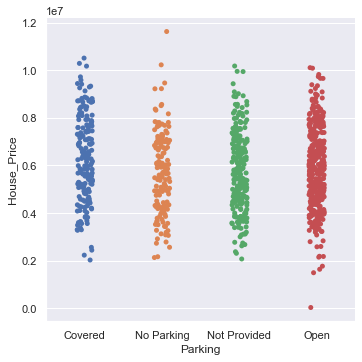

In [7]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

# Tambah dimensi di Visualisasi untuk melihat insight yang lebih jelas/baik 

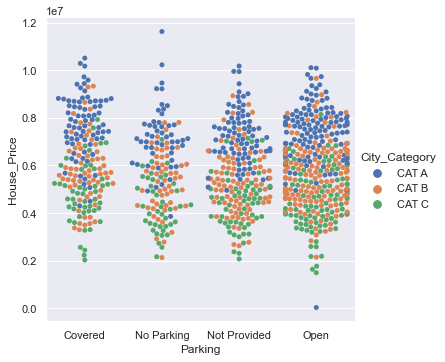

In [8]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)

# Ada informasi apakah dari hasil diatas?

# 1D Visualization: Bar Chart / Count Plot
<p><img alt="" src="images/barchart.png" /></p>

## Image Source: https://datavizcatalogue.com/methods/bar_chart.html

# Hati-hati: Bar Chart VS Histogram 
<p><img alt="" src="images/barchart_vs_histogram.png" /></p>


## image Source: https://www.mathsisfun.com/data/bar-graphs.html

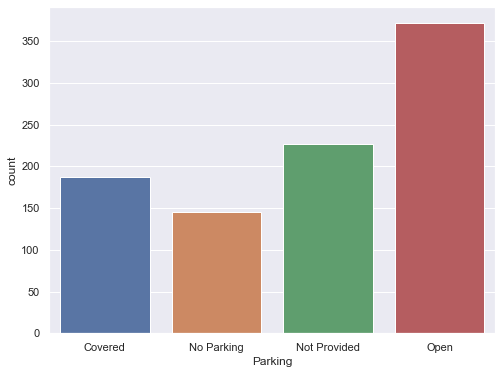

In [9]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Parking", data=price2)

# Adding labels? ... Hhhmmm...

In [10]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

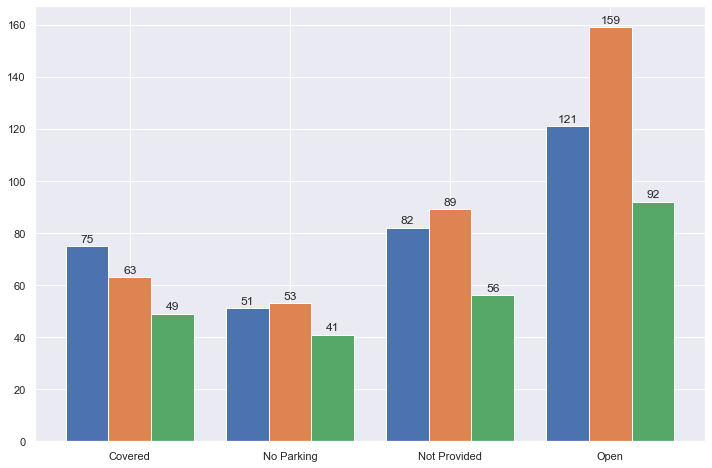

In [11]:
counts = price2.groupby(["Parking", "City_Category"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

In [12]:
price2.groupby(["Parking", "City_Category"]).size().unstack()

City_Category,CAT A,CAT B,CAT C
Parking,,,
Covered,75,63,49
No Parking,51,53,41
Not Provided,82,89,56
Open,121,159,92


# Horizontal? Why?

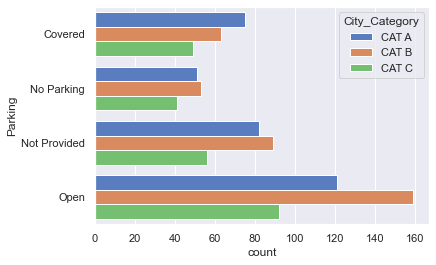

In [13]:
ax = sns.countplot(y = 'Parking', hue = 'City_Category', palette = 'muted', data=price2)

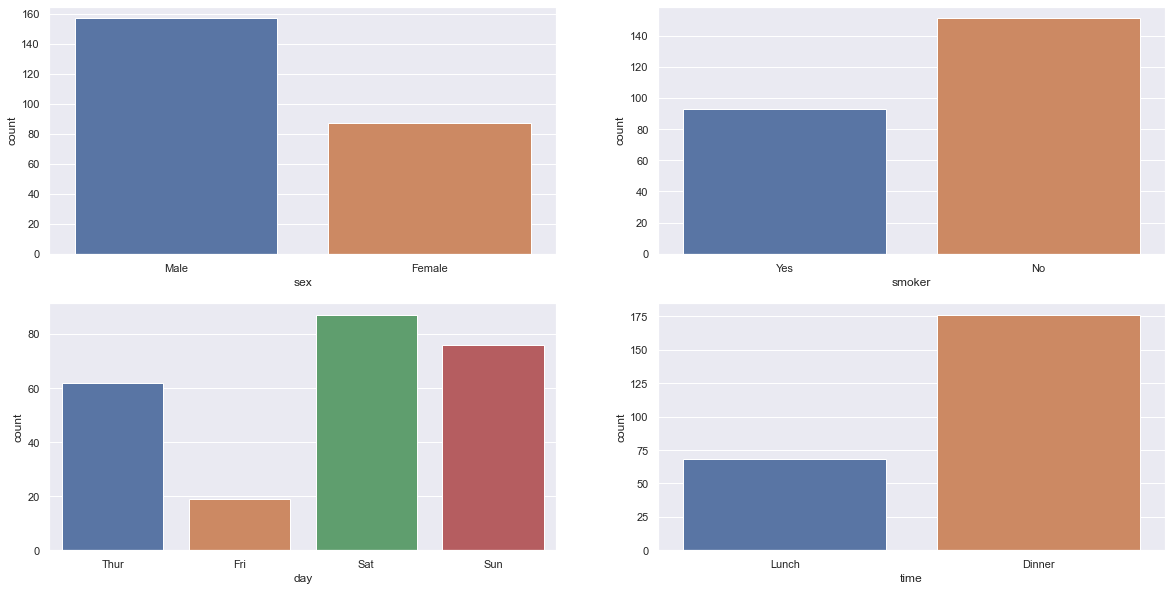

In [14]:
tips=sns.load_dataset('tips')
categorical = tips.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)

# Stacked/Segmented Chart

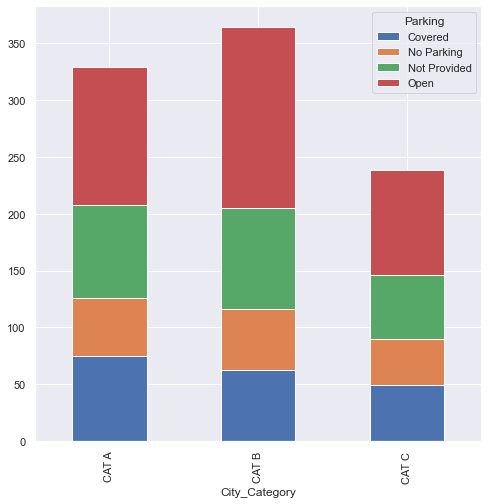

In [15]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

In [16]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

# Mosaic Plot for multiple categorical data analysis

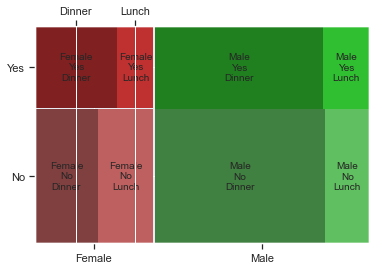

In [17]:
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex','smoker','time'])

# 1D Visualization: Pie Chart

<img alt="" src="images/piechart_meme.png" />

# 1D Visualization: Pie Chart

<img alt="" src="images/piechart.png" />

## Image Source: https://datavizcatalogue.com/methods/pie_chart.html

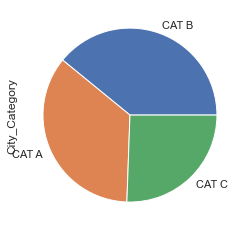

In [18]:
# PieChart
plot = price2.City_Category.value_counts().plot(kind='pie')

# Show Values?

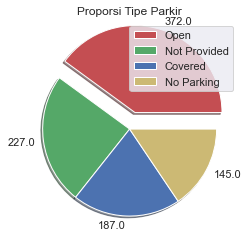

In [19]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.2, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Parkir')
plt.legend(labels,loc='best')
plt.show()

# 1D Visualization: Box Plot

<img alt="" src="images/boxplot.png" />

### Lower Extreme: $Q_1 - 1.5(Q_3-Q_1)$  Upper Extreme $Q_3 + 1.5(Q_3-Q_1)$

### Image Source: 
* https://datavizcatalogue.com/methods/box_plot.html 
* https://lsc.deployopex.com/box-plot-with-jmp/

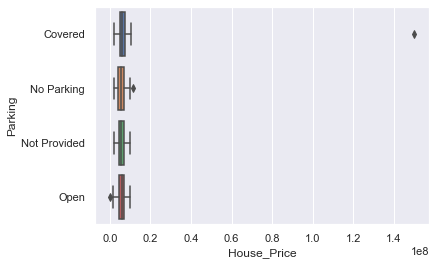

In [20]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

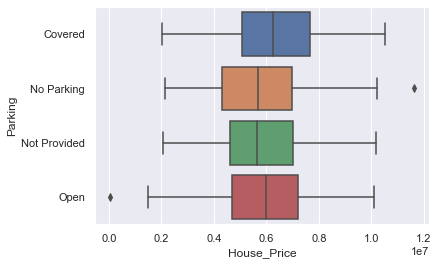

In [21]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

# Bagaimana mendapatkan data-data outliernya?

* Hati-hati beda iloc dan loc di Dataframe.
* Hati-hati Rumus Outlier Boxplot di SeaBorn!!!...

In [26]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range. 
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_ = (price2['House_Price'] < (Q1 - 1.5 *IQR)) # Outlier bawah
rumah_potensial = price2.loc[outliers_]
rumah_potensial

Q1=4658000.0, Q3=7180500.0, IQR=2522500.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [25]:
price2.loc[outliers_].shape

(1, 9)

# Tugas 1:  

### Keluarkan outlier atasnya.

# Boxplot dapat juga dipisahkan berdasarkan suatu kategori

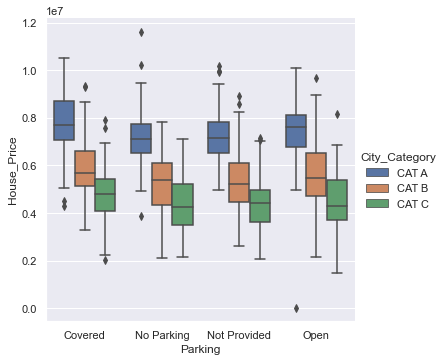

In [70]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

* Ada dugaan/interpretasi (baru) apakah dari boxPlot diatas?
* Sebutkan beberapa kelemahan (PitFalls) Box Plot?

# Tugas 2:

### Bagaimana mengeluarkan semua outlier bawah dari BoxPlot diatas?

* Petunjuk: "Slice" terlebih dahulu datanya.

# Swarn Plot & Violin Plot

### Menangani kelemahan BoxPlot.

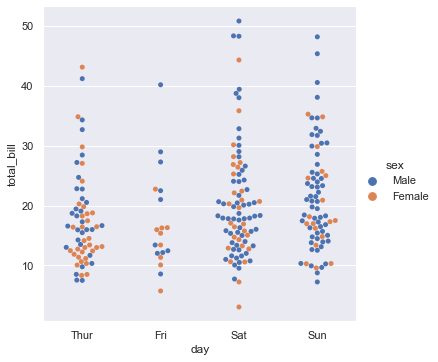

In [71]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

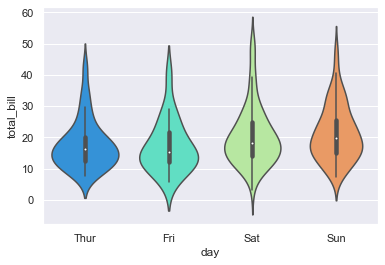

In [72]:
p = sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

# 1D Visualization: histogram

<img alt="" src="images/histogram.png" />

### image source: https://datavizcatalogue.com/methods/histogram.html

<img alt="" src="images/histogram_types.png" />

### image source: https://en.wikipedia.org/wiki/Histogram

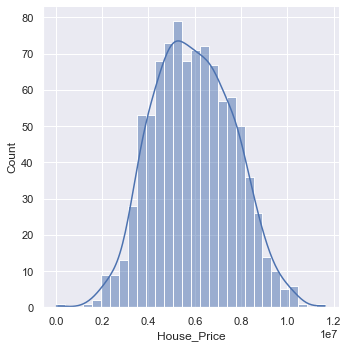

In [27]:
col = 'House_Price'
plot = sns.displot(data=price2, x=col, bins = 30, kde=True)

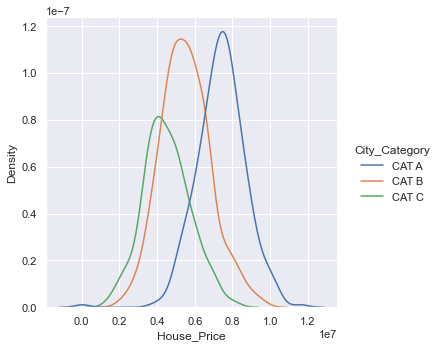

In [29]:
plot = sns.displot(data=price2, x=col, hue='City_Category', kind="kde")

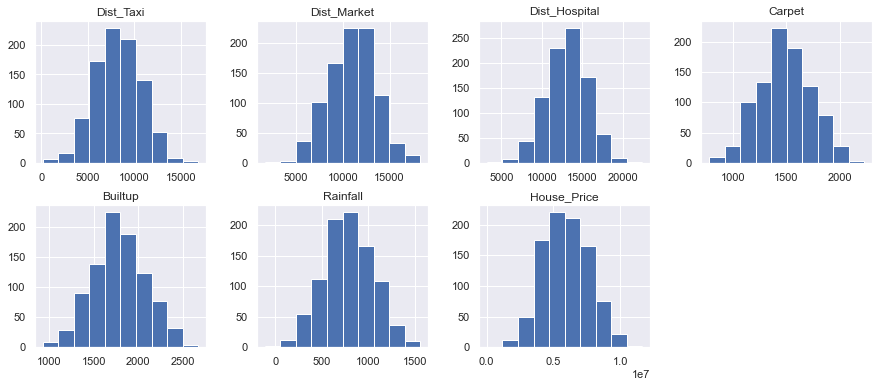

In [75]:
numerical = price2.select_dtypes(include = ['int64','float64']).columns

price2[numerical].hist(figsize=(15, 6), layout=(2, 4));

# 2D Visualization: Scatter Plot

<img alt="" src="images/scatter_plot.png" />

### image source: https://datavizcatalogue.com/methods/scatterplot.html

<img alt="" src="images/linearize.png" />

### image source: https://sites.google.com/site/apphysics1online/appendices/2-data-analysis/graph-linearization

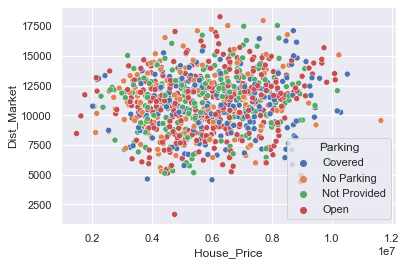

In [76]:
p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'])

# Bigger picture?

### Cara 01

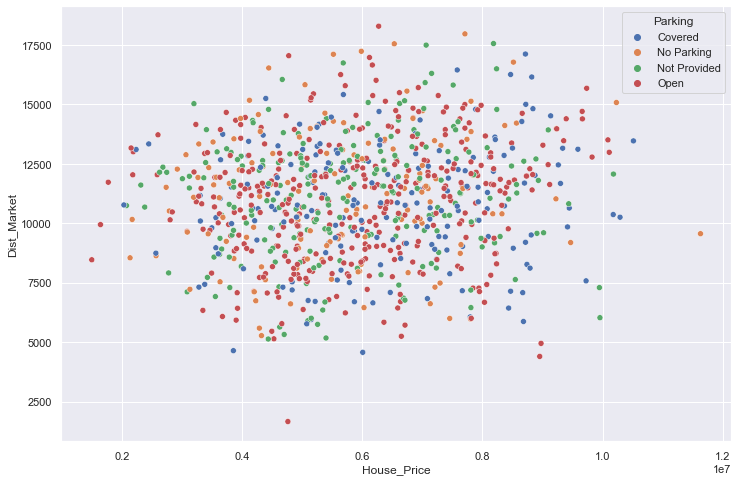

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'], ax=ax)

# Cara 02

### Cocok untuk visualisasi yang kompleks/3D

In [31]:
%matplotlib qt

p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'])

# Jangan lupa kembalikan setting ke semua (standard)

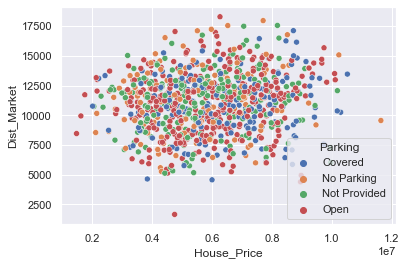

In [32]:
%matplotlib inline
p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'])

# Joined

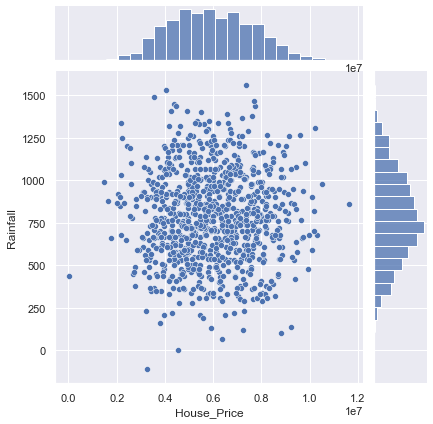

In [80]:
p = sns.jointplot(x=price2['House_Price'], y=price2['Rainfall'])

# Conditional Plot

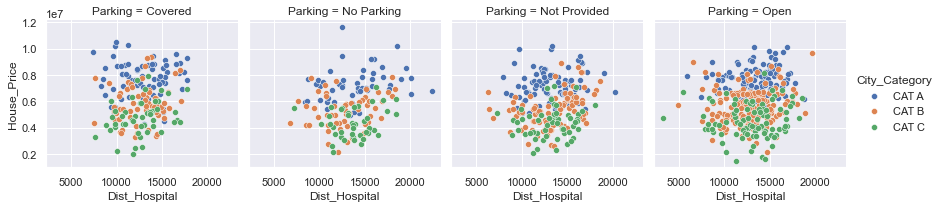

In [81]:
cond_plot = sns.FacetGrid(data=price2, col='Parking', hue='City_Category')#, hue_order=["Yes", "No"]
p = cond_plot.map(sns.scatterplot, 'Dist_Hospital', 'House_Price').add_legend()

# Pairwise Plot

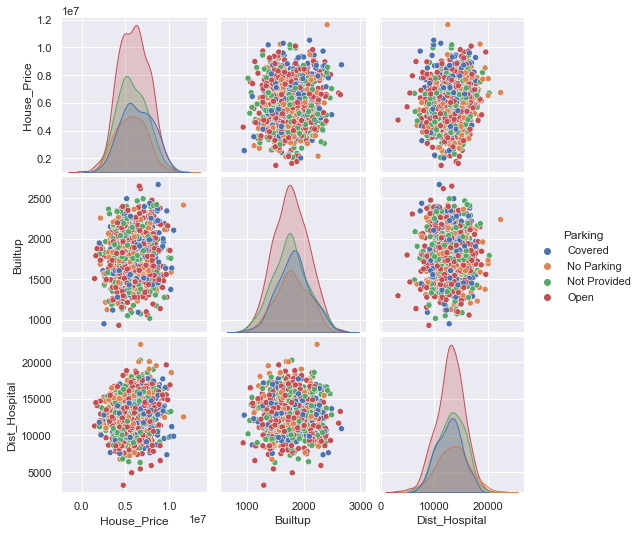

In [82]:
# Coba kita perhatikan sebagiannya saja dulu dan coba kelompokkan berdasarkan "Parking"
p = sns.pairplot(price2[['House_Price','Builtup','Dist_Hospital','Parking']], hue="Parking")
# Ada pola menarik?

# Diskusi: Scatter Plot untuk apa?

# 3D Visualization: 3D Scatter Plot

https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/

In [33]:
%matplotlib qt

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = price2['House_Price']
y = price2['Dist_Hospital']
z = price2['Rainfall']
warna = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=warna, marker='o')
ax.set_xlabel('Harga')
ax.set_ylabel('Jarak ke RS')
ax.set_zlabel('Curah Hujan')
plt.show()

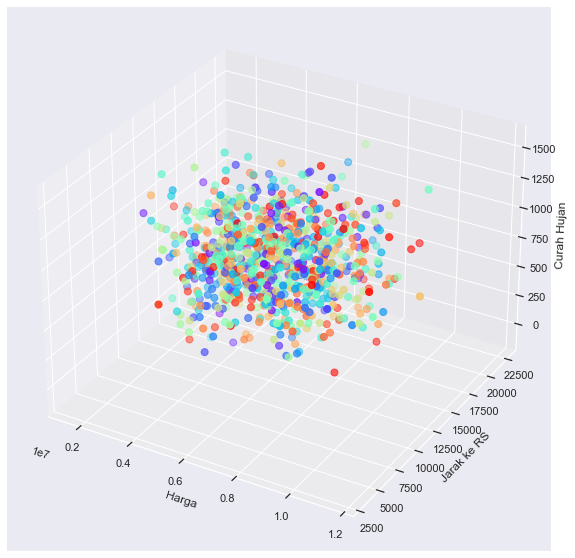

In [34]:
%matplotlib inline
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = price2['House_Price']
y = price2['Dist_Hospital']
z = price2['Rainfall']
warna = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=warna, marker='o')
ax.set_xlabel('Harga')
ax.set_ylabel('Jarak ke RS')
ax.set_zlabel('Curah Hujan')
plt.show()

# 3D Visualization:  3D Bar Plots

Bar plots are used quite frequently in data visualisation projects since they’re able to convey information, usually some type of comparison, in a simple and intuitive way. The beauty of 3D bar plots is that they maintain the simplicity of 2D bar plots while extending their capacity to represent comparative information.

https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725

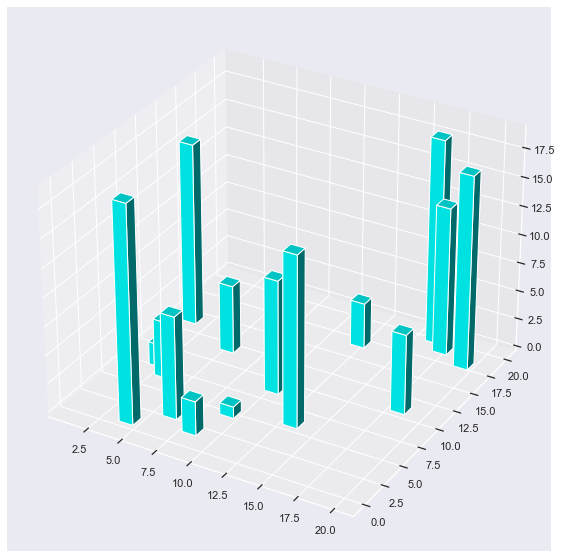

In [85]:
import random

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection="3d")

num_bars = 15
x_pos = random.sample(range(20), num_bars)
y_pos = random.sample(range(20), num_bars)
z_pos = [0] * num_bars

x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(range(20), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.show()

# Checking Correlations

In [86]:
price2.corr()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Dist_Taxi,1.000000,0.449838,0.796853,0.010547,0.006286,0.020506,0.109612
Dist_Market,0.449838,1.000000,0.620136,-0.018603,-0.020581,0.069419,0.118755
Dist_Hospital,0.796853,0.620136,1.000000,0.011125,0.008617,0.050748,0.130522
Carpet,0.010547,-0.018603,0.011125,1.000000,0.998871,-0.045308,0.102092
Builtup,0.006286,-0.020581,0.008617,0.998871,1.000000,-0.042104,0.094550
Rainfall,0.020506,0.069419,0.050748,-0.045308,-0.042104,1.000000,0.013430
House_Price,0.109612,0.118755,0.130522,0.102092,0.094550,0.013430,1.000000


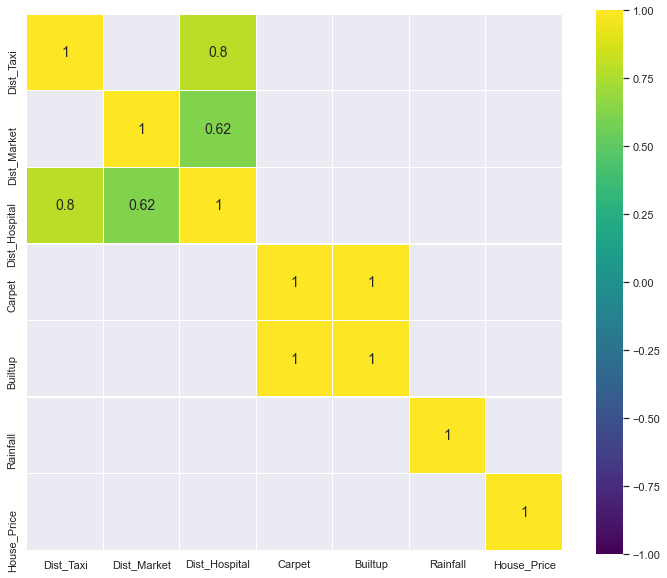

In [87]:
# HeatMap untuk menyelidiki korelasi
corr2 = price2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Iris

<img alt="" src="images/iris.jpg"/>

### image source: https://medium.com/analytics-vidhya/exploration-of-iris-dataset-using-scikit-learn-part-1-8ac5604937f8

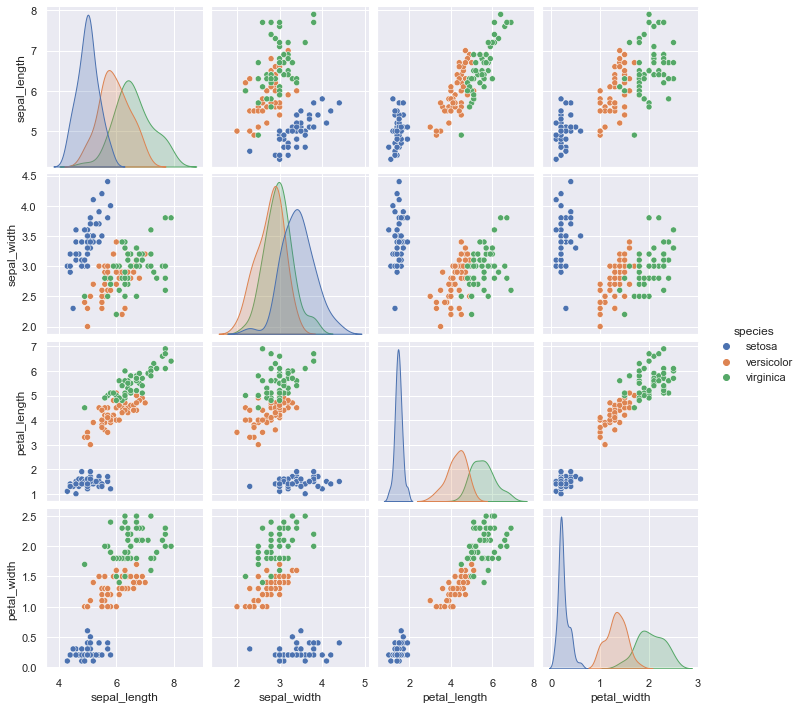

In [88]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

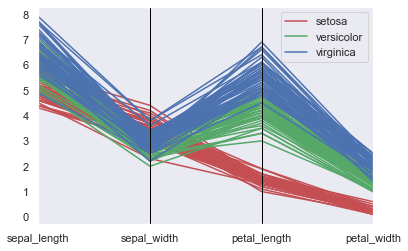

In [89]:
pd.plotting.parallel_coordinates(iris, 'species', color=('r', 'g', 'b'))
plt.show()

# Time Series Plot

In [90]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
fmri.sample(10)

,subject,timepoint,event,region,signal
14,s0,18,stim,parietal,-0.075570
116,s10,10,stim,parietal,-0.041702
900,s9,10,cue,parietal,-0.013538
571,s4,8,cue,parietal,-0.181241
1031,s9,7,cue,frontal,0.003643
89,s9,12,stim,parietal,-0.097789
1060,s13,7,cue,frontal,-0.029130
434,s1,12,stim,frontal,-0.093411
329,s7,4,stim,frontal,0.133497
656,s9,3,cue,frontal,0.048598


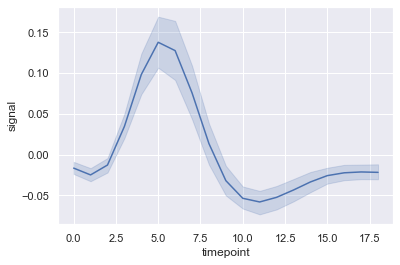

In [91]:
# Plot the responses for different events and regions
plot = sns.lineplot(x="timepoint", y="signal", data=fmri)

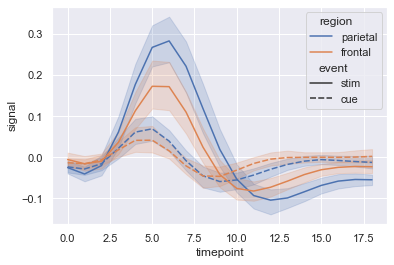

In [92]:
plot = sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

# Spatial Visualization

In [93]:
def generateBaseMap(default_location=[-0.789275, 113.921], default_zoom_start=5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [94]:
# Load Data
try:
    # Running Locally, yakinkan module folium sudah terinstall
    df_loc = pd.read_csv('data/df_loc.csv')
except:
    # Running in Google Colab, yakinkan folder "data" sudah ada
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/df_loc.csv
    df_loc = pd.read_csv('data/df_loc.csv')
    !pip install folium

In [95]:
df_loc.head()

,lat,lon,count
0,-6.87602,107.620,1
1,-7.79558,110.369,1
2,-6.87848,107.426,1
3,-6.12889,106.180,1
4,-6.20876,106.846,1


In [96]:
import folium
from folium.plugins import HeatMap

base_map = generateBaseMap()
HeatMap(data=df_loc[['lat', 'lon', 'count']].groupby(['lat', 'lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

# Hati-hati Chrome terbaru suka bermasalah dengan Folium jika datanya cukup besar

# Data Tips Restaurant

Sebuah dataset dari suatu Restaurant memuat variabel-variabel berikut:
*	total_bill: Total bill (cost of the meal), including tax, in US dollars
*	tip: Tip (gratuity) in US dollars
*	sex: Sex of person paying for the meal (0=male, 1=female)
*	smoker: Smoker in party? (0=No, 1=Yes)
*	day: 3=Thur, 4=Fri, 5=Sat, 6=Sun
*	time: 0=Day, 1=Night
*	size: Size of the party
*   **Sumber Data**: Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing
*   **Link ke data**: https://www.kaggle.com/jsphyg/tipping 

In [97]:
import seaborn as sns
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
print('Jumlah baris dan kolom  = ', tips.shape)
tips.head(3)

Jumlah baris dan kolom  =  (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


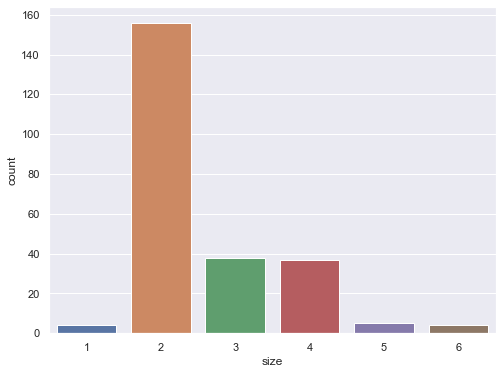

In [98]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="size", data=tips)

# Tugas 03:

## jawablah pertanyaan-pertanyaan berikut:

1. Adakah tipe variabel yang kurang tepat di data tersebut?
2. Apakah data numeriknya cenderung berdistribusi normal?
3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?
4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?
5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?
6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?
7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?
8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?
9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)
9. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant? 

* Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?

# End of Module
<hr>
<img alt="" src="images/meme_7.png"/>